In [1]:
# Importing all the Required Libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Creating the DataFrame of the CSV File
df = pd.read_csv('diamonds.csv')

# Dropping the Index Column
df.drop('Unnamed: 0', axis=1, inplace=True)

# 1) Checking For Null Values

In [3]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

**There are no missing values**

# 2) EDA

### 1) Price Distribution Plot

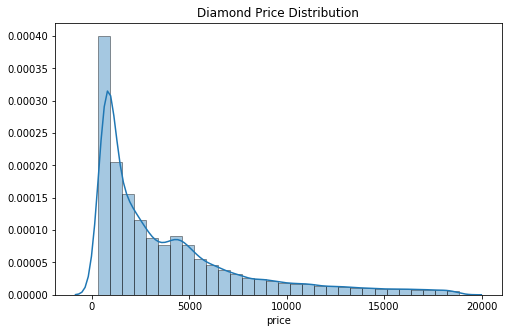

In [4]:
plt.figure(figsize=(8, 5))
sns.distplot(a=df['price'], bins=30, kde=True, hist_kws={'ec':'black'})

plt.title('Diamond Price Distribution');

- **We can see that the Price Distribution is not Normal**
- **The Prices are skewed to the Right**

In [5]:
print(f"The mean of the Price is {round(df['price'].mean())} $")
print(f"The median of the Price is {round(df['price'].median())} $")      

The mean of the Price is 3933 $
The median of the Price is 2401 $


### 2) Box Plot for Price Column

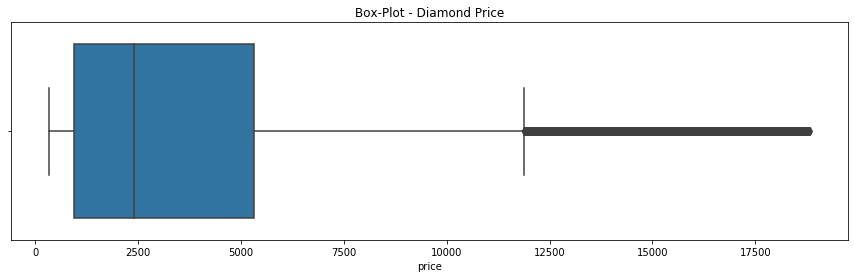

In [6]:
plt.figure(figsize=(15, 4))
sns.boxplot(x=df["price"])

plt.title('Box-Plot - Diamond Price');
# sns.regplot(x="total_bill", y="tip", data=tips)

### 3) Correlation With Price Column

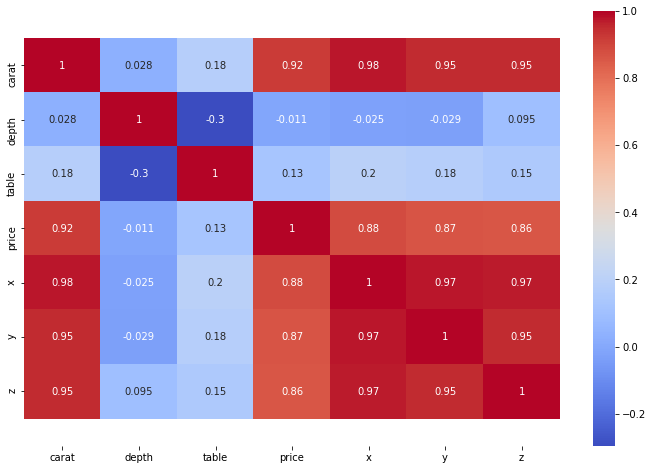

In [7]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

# To prevent cutting of the heatmap
plt.ylim(plt.gca().get_ylim()[0] + 0.5, plt.gca().get_ylim()[1] - 0.5);

- **We can see that Carat column has the highest correlation with the Price column**
- **The siize columns x, y, z also have a very high correlation with the Price column**

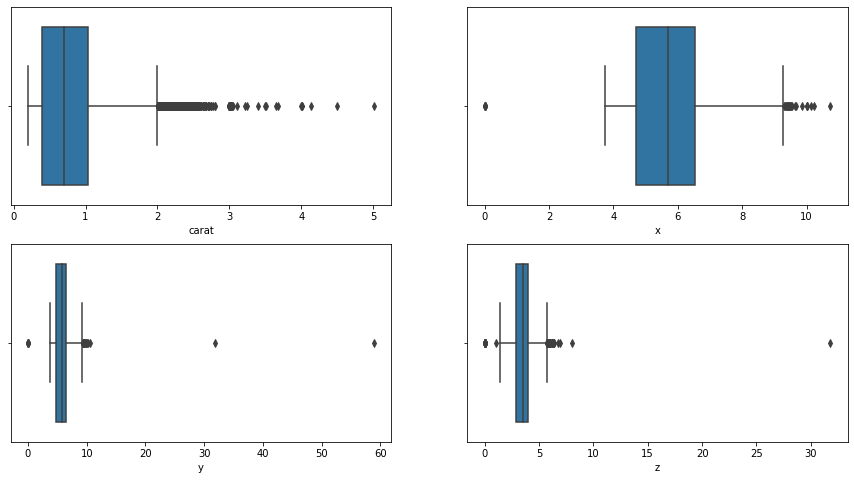

In [8]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))
ax = ax.flatten()

sns.boxplot(x=df["carat"], ax=ax[0])
sns.boxplot(x=df["x"], ax=ax[1])
sns.boxplot(x=df["y"], ax=ax[2])
sns.boxplot(x=df["z"], ax=ax[3])

- **We can observe from the Box Plot above that there are some values of x, y, z which are 0, which cannot be correct because x, y, z are related to size**
- **We should drop those values**
- **Also there are some outliers which are way above the normal range, We will also drop those**

In [9]:
df = df[(df[['x','y','z']] != 0).all(axis=1)]

In [10]:
df.loc[(df['x']==0) | (df['y']==0) | (df['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z


**We can see that all the columns whit x,y,z = 0 have been dropped**

In [11]:
df = df[(df[['y']] < 25).any(axis=1)]
df = df[(df[['z']] < 25).any(axis=1)]

df.reset_index(inplace=True, drop=True)

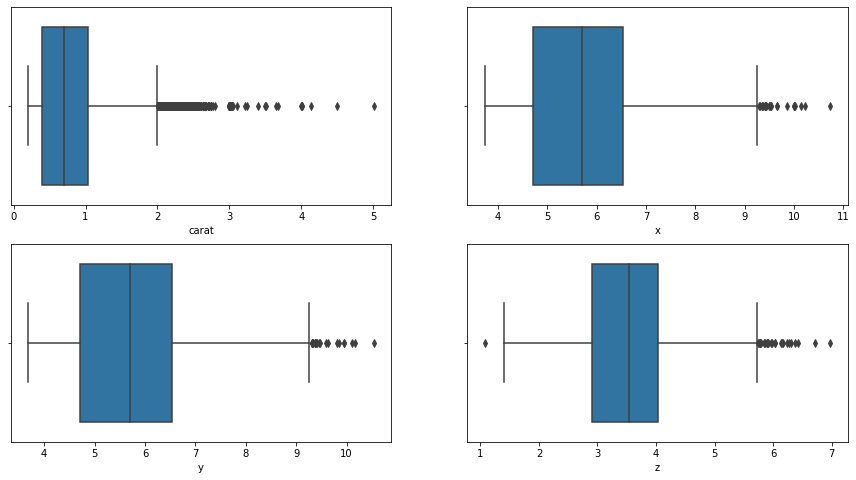

In [12]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))
ax = ax.flatten()

sns.boxplot(x=df["carat"], ax=ax[0])
sns.boxplot(x=df["x"], ax=ax[1])
sns.boxplot(x=df["y"], ax=ax[2])
sns.boxplot(x=df["z"], ax=ax[3])

**From the above Box Plot We can see that we have removed all the extreme outliers**

## 4) Scatter Plot 

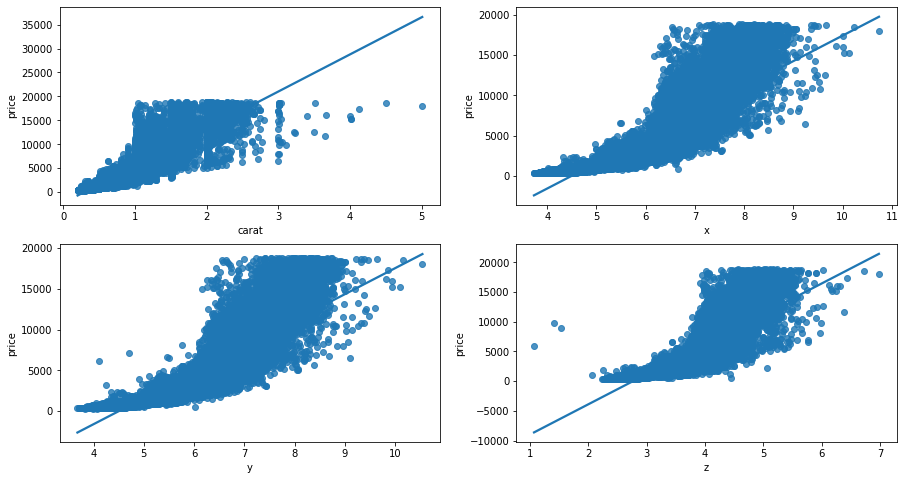

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))
ax = ax.flatten()

sns.regplot(x="carat", y="price", data=df, ax=ax[0])
sns.regplot(x="x", y="price", data=df, ax=ax[1])
sns.regplot(x="y", y="price", data=df, ax=ax[2])
sns.regplot(x="z", y="price", data=df, ax=ax[3])

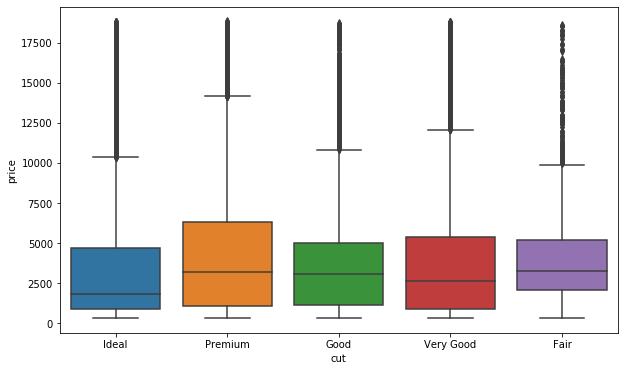

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cut', y='price', data=df);

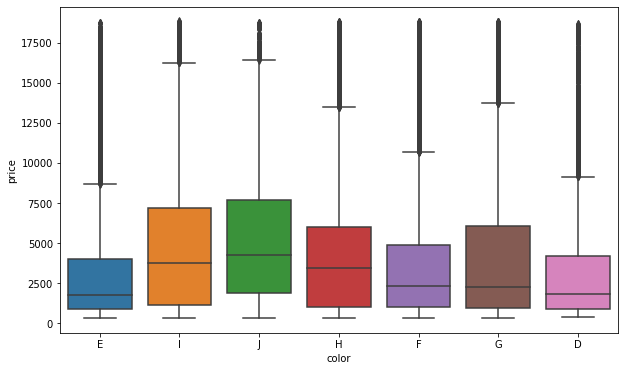

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='color', y='price', data=df);

**We can see that there are Expensive Diamonds in every Category regardless of Color**

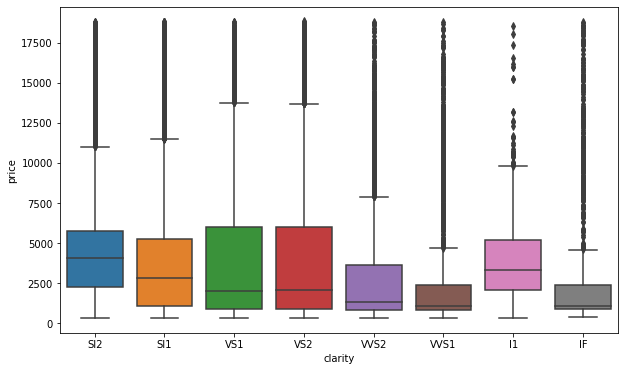

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='clarity', y='price', data=df)

**We can see that there are Expensive Diamonds in every Category regardless of Clarity**

# 3) Feature Encoding

**We will map the Categorical Features Individually**

**The Given Categorical Features are Ordinal, so we will try to map the features according to their ordinal Precedence**

In [17]:
diamond_cut = {'Fair':0,
               'Good':1,
               'Very Good':2, 
               'Premium':3,
               'Ideal':4}

diamond_color = {'J':0,
                 'I':1, 
                 'H':2,
                 'G':3,
                 'F':4,
                 'E':5,
                 'D':6}

diamond_clarity = {'I1':0,
                   'SI2':1,
                   'SI1':2,
                   'VS2':3,
                   'VS1':4,
                   'VVS2':5,
                   'VVS1':6,
                   'IF':7}

In [18]:
# Mapping the Dictionary to our Columns

df.cut = df.cut.map(diamond_cut)
df.clarity = df.clarity.map(diamond_clarity)
df.color = df.color.map(diamond_color)

**Now our Data is ready for Modelling**

# 4) Modelling

**Linear Regression**

In [19]:
# Seperating our data into Feature & Target Variables
X = df.drop('price', axis=1)
y = np.log(df['price'])

from sklearn.model_selection import train_test_split

# Splitting our Data into Training & Testing Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [20]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()

regression.fit(X_train, y_train)

regression.score(X_test,  y_test)
predictions = regression.predict(X_test)

In [21]:
from sklearn import metrics

print("MSE = {}".format(metrics.mean_squared_error(y_test,predictions)))
print("R2 Score = {}".format(metrics.r2_score(y_test,predictions)))

MSE = 0.02129122494201356
R2 Score = 0.979569811958315


In [22]:
#predictions = regression.predict(X_test)

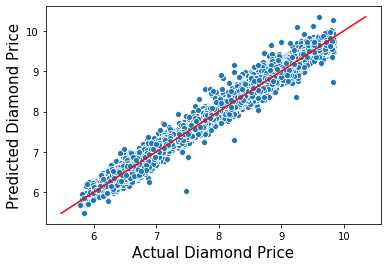

In [23]:
# Plotting Actual vs Predicted Values
sns.scatterplot(x=y_test, y=predictions)
sns.lineplot(x=predictions,y=predictions,  color='red') 

plt.xlabel('Actual Diamond Price', fontsize = 15)
plt.ylabel('Predicted Diamond Price', fontsize = 15);

In [24]:
sns.lineplot()

TypeError: object of type 'NoneType' has no len()

In [25]:
# Difference between Actual & Predicted Values
residuals = y_test - predictions

In [ ]:
sns.distplot(residuals);

**The Resiuduals are Normally Distributed**

In [ ]:
print('The Mean of Residuals is {}' .format(round(residuals.mean())))

In [ ]:
sns.scatterplot(predictions,residuals)
plt.show();

**There are no viisible patterns, the Given Data is Homoscedastic**